# Statistical Significance Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# choosing two-sample t-test 
from scipy.stats import ttest_ind

In [2]:
device_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\DeviceProperty.csv")
prod_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\ProductionMetric.csv")
quality_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\Quality.csv")
prod_df

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,0.000000,185.300072,0.0,185.300072,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,0.000000,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5420551,Line3,2025-01-17 11:26:05.5650680 -06:00,2025-01-17 11:29:11.4843000 -06:00,0,0,0.000000,0.000000,185.919232,0.0,185.919232,Unplanned Stop,Down,No Bottles,Part F-3000,Part F,First Shift,Team 1
9996,5420547,Line3,2025-01-17 11:19:12.1559110 -06:00,2025-01-17 11:26:05.5650680 -06:00,210,16,372.159850,413.409157,0.000000,0.0,0.000000,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1
9997,5420543,Line3,2025-01-17 11:16:22.5533940 -06:00,2025-01-17 11:19:12.1559110 -06:00,0,0,0.000000,0.000000,169.602517,0.0,169.602517,Unplanned Stop,Down,Random Inspection,Part F-3000,Part F,First Shift,Team 1
9998,5420541,Line3,2025-01-17 11:15:00.0000000 -06:00,2025-01-17 11:16:22.5533940 -06:00,13,10,37.762533,82.553394,0.000000,0.0,0.000000,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1


# Mean Unplanned Downtime vs two Production Lines

In [67]:
# filtering out zeros from downtime since when it's zero it means everything is running normally
downtime_df = prod_df[prod_df['unplanned_stop_time'] > 0]

# filtering out only deviceKeys that contain Line 1 or Line 2
line1 = downtime_df[downtime_df['deviceKey'] == 'Line1']['unplanned_stop_time']
line2 = downtime_df[downtime_df['deviceKey'] == 'Line2']['unplanned_stop_time']

In [4]:
# calculating the stat and p-value 
stat, p = ttest_ind(line1, line2, equal_var=False)
alpha = 0.05
print(f'Test Statistic: {stat:.2}')
print(f'p-value: {p:.2}')

Test Statistic: 2.5
p-value: 0.012


In [5]:
# just further comfirm the conclusion of the hypothesis
if p < alpha:
    print('Reject the null hypothesis (significant difference)')
else:
    print('Failed to reject the null hypothesis (no significant difference)')

Reject the null hypothesis (significant difference)


In [6]:
# finding effect size 
# using x and y for placeholders just in case we have to use it again
def cohen_d(x,y):
# note: ddof=1 for n=1
    return (np.mean(x)-np.mean(y))/np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2)/2)
effect_size = cohen_d(line1,line2)
effect_size

0.1404082154741336

In [7]:
# 0.14 means there's a tiny difference 

In [8]:
# visualizing the results 
# creating dataframe to make it easier to make a visual
downtime_compare = pd.DataFrame({
    'total_downtime': list(line1)+list(line2),
    'line': ['Line 1']*len(line1) + ['Line 2']*len(line2)
})

Text(0, 0.5, 'Total Downtime')

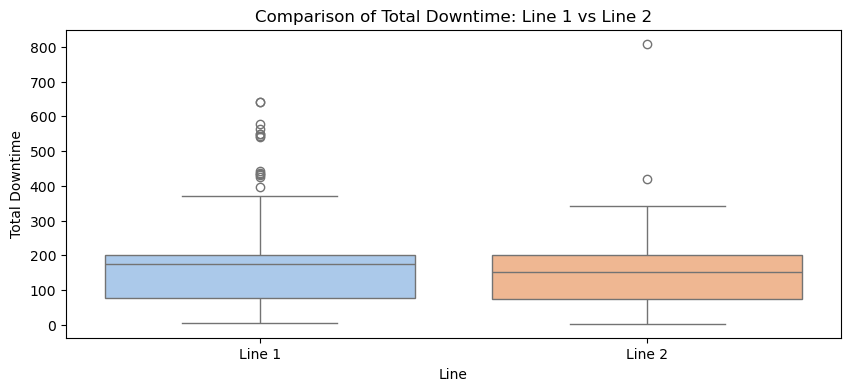

In [9]:
# preview of visual aka. rough draft
plt.figure(figsize=(10,4))
sns.boxplot(data=downtime_compare, x='line', y='total_downtime', hue='line', palette='pastel', legend=False)
plt.title('Comparison of Total Downtime: Line 1 vs Line 2', fontsize=12)
plt.xlabel('Line')
plt.ylabel('Total Downtime')

Text(0.5, 804.164892, '* p < 0.05')

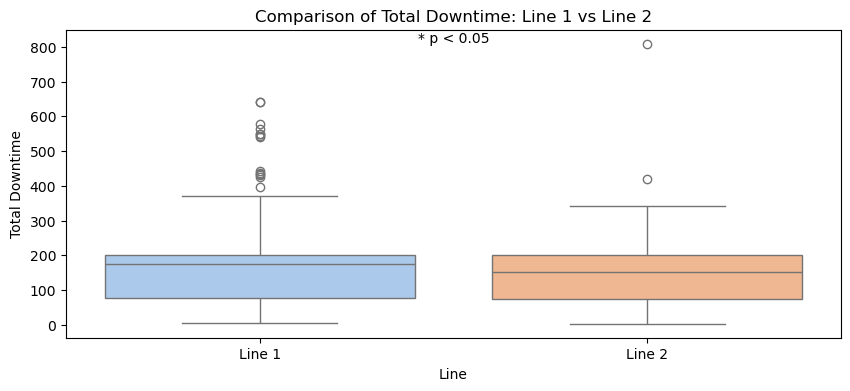

In [10]:
# final version
plt.figure(figsize=(10,4))
sns.boxplot(data=downtime_compare, x='line', y='total_downtime', hue='line', palette='pastel', legend=False)
plt.title('Comparison of Total Downtime: Line 1 vs Line 2', fontsize=12)
plt.xlabel('Line')
plt.ylabel('Total Downtime')

# setting labels 
# * = significant
# n.s. = no significance
if p < alpha: 
    significance = '* p < 0.05'
else:
    significance = 'n.s.'

# finding the highest downtime amongst the two lines to get a gauge where to place text - mainly for clarity purposes
y_max = downtime_compare['total_downtime'].max()
plt.text(0.5, y_max-5, significance, ha='center', va='bottom')

# Test Differences in Reject Rate Across Shifts

In [68]:
# using ANOVA
from scipy.stats import f_oneway
# doing it all over again
# have to filter out negatives and zeros first because can't divide by zero
prod_df = prod_df[prod_df['good_count']>=0]
prod_df = prod_df[(prod_df['reject_count']+prod_df['good_count'])>0]

prod_df.loc[:,'reject_rate'] = prod_df['reject_count']/(prod_df['reject_count']+prod_df['good_count'])

first_shift = prod_df[prod_df['shift_display_name'] == 'First Shift']['reject_rate'].dropna()
second_shift = prod_df[prod_df['shift_display_name'] == 'Second Shift']['reject_rate'].dropna()
third_shift = prod_df[prod_df['shift_display_name'] == 'Third Shift']['reject_rate'].dropna()

stat, p = f_oneway(first_shift, second_shift, third_shift)
alpha = 0.05
print(stat)
print(p)

0.5533852456771677
0.5750348117687523


In [61]:
if p < alpha:
    print('Reject the null hypothesis (there IS a significant difference between shifts)')
else:
    print('Fail to reject the null hypothesis (no significant difference between shifts)')

Fail to reject the null hypothesis (no significant difference between shifts)


In [65]:
# finding effect size 
# have to get the values for df_between and df_within first
n = len(first_shift) + len(second_shift) + len(third_shift)
df_between = 2
df_within = n - 3

def eta_squared(f, df_between, df_within): 
    return (f * df_between) / (f * df_between + df_within)

eta2 = eta_squared(stat, df_between, df_within)
eta2

0.00021881121565308945

In [66]:
# effect size shows that result is negligible which coincides with result of no significance 

In [15]:
# although it failed to reject the null hypothesis, will still do the post-hoc test for clarity 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [16]:
# reshaping data to make it easier to visualize 
tukey_data = pd.DataFrame({
    'reject_rate': list(first_shift)+list(second_shift)+list(third_shift),
    'shift': ['First Shift']*len(first_shift)+['Second Shift']*len(second_shift)+['Third Shift']*len(third_shift)
})

In [17]:
tukey_results = pairwise_tukeyhsd(endog=tukey_data['reject_rate'], groups=tukey_data['shift'], alpha=0.05)
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
First Shift,Second Shift,-0.0034,0.6615,-0.0127,0.0058,False
First Shift,Third Shift,0.0003,0.996,-0.0091,0.0098,False
Second Shift,Third Shift,0.0038,0.6128,-0.0056,0.0131,False


In [18]:
# First Shift Second Shift has lower reject rate compared to the other two groups with a higher reject rate
# none of them are statistically significant 
# conclusion: there are no differences amongst the shifts 

<Axes: xlabel='shift', ylabel='reject_rate'>

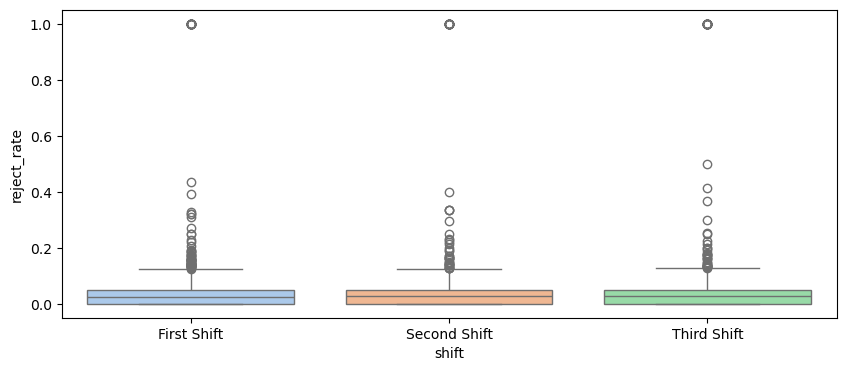

In [19]:
# visualizing boxplot
plt.figure(figsize=(10,4))
sns.boxplot(data=tukey_data, x='shift', y='reject_rate', hue='shift', palette='pastel', legend=False)

Text(0, 0.94, 'n.s.')

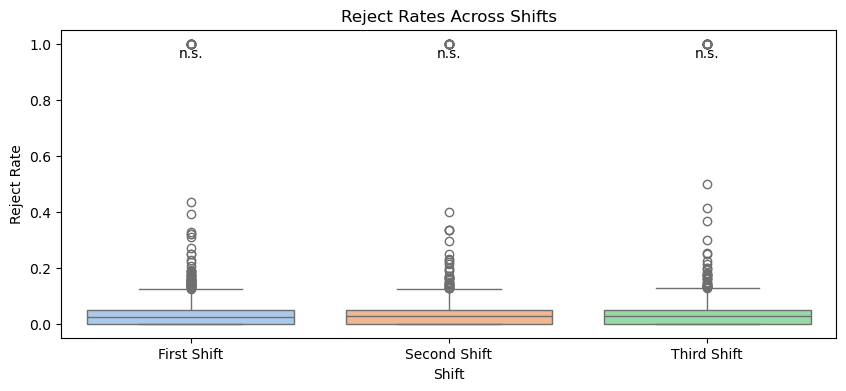

In [20]:
# customizing visual
plt.figure(figsize=(10,4))
sns.boxplot(data=tukey_data, x='shift', y='reject_rate', hue='shift', palette='pastel', legend=False)
plt.title('Reject Rates Across Shifts')
plt.xlabel('Shift')
plt.ylabel('Reject Rate')

# adding significance 
y_max = tukey_data['reject_rate'].max()
plt.text(1, y_max-.06, 'n.s.', ha='center', va='bottom')
plt.text(2, y_max-.06, 'n.s.', ha='center', va='bottom')
plt.text(0, y_max-.06, 'n.s.', ha='center', va='bottom')

# Association Between Process-State Reason and Shift

In [21]:
# Association between process-state reason and shift
# finding out if some reasons occur more frequency in specific shifts or if it's frequently distributed
from scipy.stats import chi2_contingency

In [25]:
# making contingency table 
contingency_table = pd.crosstab(
    prod_df['process_state_reason_display_name'],
    prod_df['shift_display_name']
)
alpha = 0.05
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)
print(chi2_stat)
print(p)
print(dof)

5113.689395095247
0.0
76


In [34]:
# data looks off, might be because of entries like 'No Shift' or 'No Shift Scheduled' 
# filtering them out and redoing the test
valid_data = prod_df[
    (~prod_df['shift_display_name'].isin(['No Shift','Unknown Shift'])) &
    (~prod_df['process_state_reason_display_name'].isin(['No Shift Scheduled']))
]
contingency_table = pd.crosstab(
    valid_data['process_state_reason_display_name'],
    valid_data['shift_display_name']
)
alpha = 0.05
chi2_stat, p, dof, expected = chi2_contingency(contingency_table)
print(chi2_stat)
print(p)
print(dof)

35.562886802275884
0.4892200028970495
36


In [42]:
if p < alpha: 
    print('Reject the null hypothesis (there is significant assocation)')
else: 
    print('Failed to reject null hypothesis (there is no association)')

Failed to reject null hypothesis (there is no association)


In [62]:
# finding effect size first
def cramers_v(chi2, n, dim):
    return np.sqrt(chi2 / (n * (min(dim) - 1)))

In [63]:
n = contingency_table.values.sum()
dim = contingency_table.shape
v = cramers_v(chi2_stat, n, dim)
v

0.0592800071629276

In [64]:
# conclusion, extremely minor associaton, so weak that it's negligible

Text(95.7222222222222, 0.5, 'Process-State Reason')

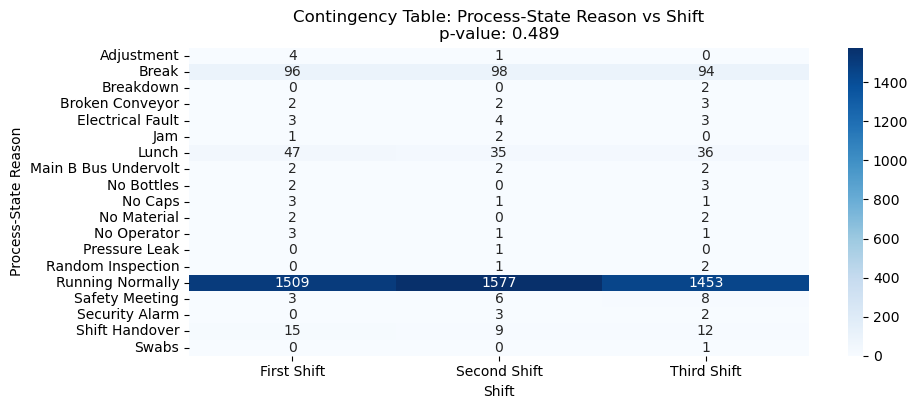

In [43]:
# creating visual and then customizing it
plt.figure(figsize=(10,4))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title(f'Contingency Table: Process-State Reason vs Shift\np-value: {p:.3f}' )
plt.xlabel('Shift')
plt.ylabel('Process-State Reason')

# Significance of the Correlation Between Unplanned_Stop_Time and Reject_Count

In [71]:
# using Spearman because data might not be linear 
from scipy.stats import spearmanr

In [46]:
corr, p = spearmanr(prod_df['unplanned_stop_time'], prod_df['reject_count'])
alpha = 0.05
print(corr)
print(p)

-0.011449158522540963
0.41467522408690904


In [47]:
if p < alpha: 
    print('Reject null hypothesis (there is correlation)')
else: 
    print('Failed to reject null hypothesis (there is no correlation)')

Failed to reject null hypothesis (there is no correlation)


In [50]:
# zeros could've affected the data, trying it after filtering out the zeros
filtered_df = prod_df[
    (prod_df['unplanned_stop_time']>0) &
    (prod_df['reject_count']>0)
]
filtered_corr, filtered_p = spearmanr(filtered_df['unplanned_stop_time'], filtered_df['reject_count'])
print(filtered_corr)
print(filtered_p)

0.027320041453180167
0.8344474462079543


In [51]:
if p < alpha: 
    print('Reject null hypothesis (there is correlation)')
else: 
    print('Failed to reject null hypothesis (there is no correlation)')

Failed to reject null hypothesis (there is no correlation)


In [52]:
# regardless filtering out the data, there's still no correlation

Text(0, 0.5, 'Reject Count')

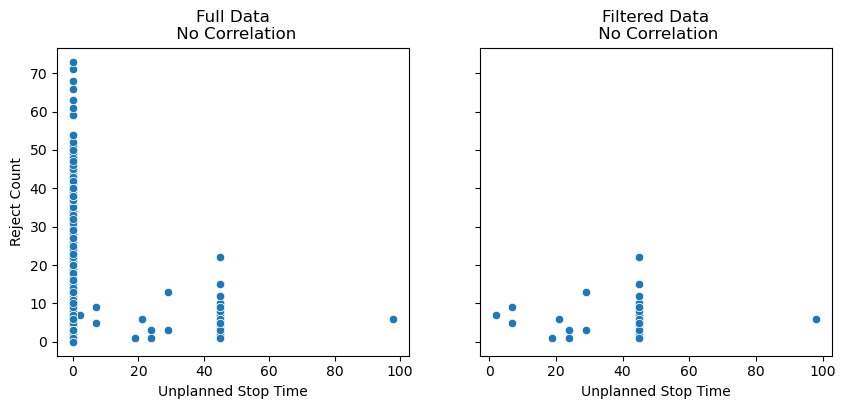

In [59]:
# will visualize both to be able to compare the two 
fig, axes = plt.subplots(1,2, figsize=(10,4), sharey=True)

# full dataset
sns.scatterplot(data=prod_df, x='unplanned_stop_time', y='reject_count', ax=axes[0])
axes[0].set_title('Full Data\n No Correlation')
axes[0].set_xlabel('Unplanned Stop Time')
axes[0].set_ylabel('Reject Count')

# filtered data with no zeros
sns.scatterplot(data=filtered_df, x='unplanned_stop_time', y='reject_count', ax=axes[1])
axes[1].set_title('Filtered Data\n No Correlation')
axes[1].set_xlabel('Unplanned Stop Time')
axes[1].set_ylabel('Reject Count')

In [82]:
# creating a table of results 
results = {
    "Hypothesis": [
        r"H_0!: \mu_A=\mu_B (Line 1 & Line 2) vs. H_1!: \mu_A\neq\mu_B",
        r"H_0!: \mu_{\text{First}}=\mu_{\text{Second}}=\mu_{\text{Third}}",
        r"H_0!: Process-State Reason is Independent of Shift",
        r"H_0!: \rho=0 vs. H_1!: \rho\neq0 (Correlation Between unplanned_stop_time and reject_count"
    ],
    "Test Type": [
        "Two-Sample T-Test",
        "ANOVA",
        "Chi-Square Test of Independence",
        "Spearman's Rank Correlation"
    ],
    "p-value": [
        0.012,
        0.58,
        0.49,
        "0.41 / 0.83"  # full vs filtered 
    ],
    "Effect Size": [
        "0.14 (small)",
        "0.0002 (negligible)",
        "0.06 (small)",
        "-0.01 / 0.027 (negligible)"  # full vs filtered
    ],
    "Decision": [
        "Unplanned downtime differs slightly between Line 1 and Line 2 (significant)",
        "No significant difference in reject rate across shifts",
        "No significant association between process-state reason and shift",
        "No significant correlation between unplanned stop time and reject count"
    ]
}
results_df = pd.DataFrame(results)
results_df

,Hypothesis,Test Type,p-value,Effect Size,Decision
0,H_0!: \mu_A=\mu_B (Line 1 & Line 2) vs. H_1!: ...,Two-Sample T-Test,0.012,0.14 (small),Unplanned downtime differs slightly between Li...
1,H_0!: \mu_{\text{First}}=\mu_{\text{Second}}=\...,ANOVA,0.58,0.0002 (negligible),No significant difference in reject rate acros...
2,H_0!: Process-State Reason is Independent of S...,Chi-Square Test of Independence,0.49,0.06 (small),No significant association between process-sta...
3,H_0!: \rho=0 vs. H_1!: \rho\neq0 (Correlation ...,Spearman's Rank Correlation,0.41 / 0.83,-0.01 / 0.027 (negligible),No significant correlation between unplanned s...


In [83]:
# formatting the rest of the table in docs
results_df.to_csv("test_results.csv", index=False)